<a href="https://colab.research.google.com/github/CoderAPS/HuBMAP/blob/main/dialation_and_erosion_with_opnecv_20230729.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sources:
dialation<br>
https://www.geeksforgeeks.org/dilated-convolution/ <br>
How to dilate an image using OpenCV?<br>
https://www.projectpro.io/recipes/ what-is-dilation-of-image-dilate-image-opencv <br>
https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/ <br>
https://www.educative.io/answers/dilation-on-an-image-using-opencv-in-python

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!ls /gdrive/MyDrive/DATA/HuBMAP

annotation_info.csv    images_info.csv	      test
blue_images	       masks		      test2
coco_85train_dataset   masks_white_bkgrnd     test_list.csv
coco_85train_dataset2  norm_images	      tile_meta.csv
coco_85train_dataset3  polygons.jsonl	      train_list.csv
enhanced_images        red_images	      val_list.csv
gray_images	       Results		      wsi_meta.csv
images		       sample_submission.csv


In [31]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tqdm.notebook import tqdm_notebook

%matplotlib inline


In [6]:
file_path = '/gdrive/MyDrive/DATA/HuBMAP/'

In [9]:
images_info = pd.read_csv(file_path + 'images_info.csv',index_col=0)
images_with_masks = images_info[images_info.has_mask == 'yes']
images_with_masks

,id,has_mask,image_path
3,da5cca9855f5,yes,/gdrive/MyDrive/DATA/HuBMAP/images/da5cca9855f...
6,db8391d91d8d,yes,/gdrive/MyDrive/DATA/HuBMAP/images/db8391d91d8...
10,daf9beac4413,yes,/gdrive/MyDrive/DATA/HuBMAP/images/daf9beac441...
12,da3180fa5201,yes,/gdrive/MyDrive/DATA/HuBMAP/images/da3180fa520...
14,dad151b200fe,yes,/gdrive/MyDrive/DATA/HuBMAP/images/dad151b200f...
...,...,...,...
7019,00ca2f4c8918,yes,/gdrive/MyDrive/DATA/HuBMAP/images/00ca2f4c891...
7021,00656c6f2690,yes,/gdrive/MyDrive/DATA/HuBMAP/images/00656c6f269...
7022,00da8fdf2391,yes,/gdrive/MyDrive/DATA/HuBMAP/images/00da8fdf239...
7026,003504460b3a,yes,/gdrive/MyDrive/DATA/HuBMAP/images/003504460b3...


In [41]:
def assign_class_color(mask,assign_color=True):

  # If mask is not a numpy (some sort tf eagortensor)
  # convert to numpy array - this is for pre-mask
  #if type(mask_input) is not np.ndarray:
  #  mask_input = np.squeeze(mask_input.numpy(),-1).astype(np.uint8)

  # Color assign each class (background, blood vessel, glomerulus and unsure)
  # a distinct color to be displayed with when viewd
  if assign_color:  # assign different color to all four classes
    palette = [255,255,255,     # 0=white
              255,0,0,          # 1= red
              255,255,0,        # 2=yellow
              0,0,255]          # 3=blue
  else: # assign color only to blood vessels and keep the rest white
    palette = [255,255,255,     # 0= white
              255,0,0,          # 1= red
              255,255,255,      # 2= white
              255,255,255]      # 3= white

  # Pad with zeroes to 768 values, i.e. 256 RGB colours
  palette = palette + [0]*(768-len(palette))

  # Convert Numpy array to palette image
  mask_pi = Image.fromarray(mask)

  # Put the palette in
  mask_pi.putpalette(palette)

  return mask_pi

In [115]:
def dilate(image_path):
  image = cv2.imread(image_path)
  kernel = np.ones((7, 7), np.uint8)
  dilated_image = cv2.dilate(image, kernel, iterations=1)
  return dilated_image

In [95]:
def display(image_id,image_path,mask_path,num):

  image = cv2.imread(image_path)

  image_mod = dialate(image,num)

  mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)

  mask = assign_class_color(mask,assign_color=True)

  plt.figure(figsize=(15,15))

  plt.subplot(1,4,1)
  plt.imshow(image)
  plt.title(f'Original: {image_id}')
  plt.axis('off')

  plt.subplot(1,4,2)
  plt.imshow(mask)
  plt.title(f'Mask')
  plt.xticks([])
  plt.yticks([])

  plt.subplot(1,4,3)
  plt.imshow(image)
  plt.imshow(mask, alpha=0.4)
  plt.title(f'Overlay: Original + Mask')
  plt.axis('off')

  plt.subplot(1,4,4)
  plt.imshow(image_mod)
  plt.title(f'Modified Image')
  plt.axis('off')


plt.show()


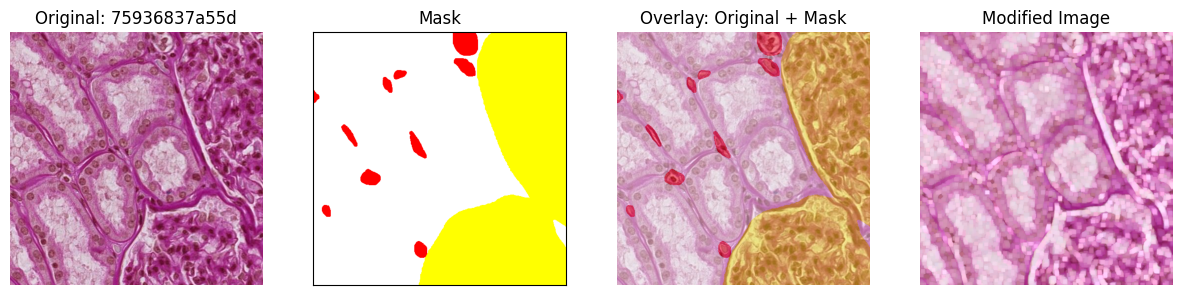

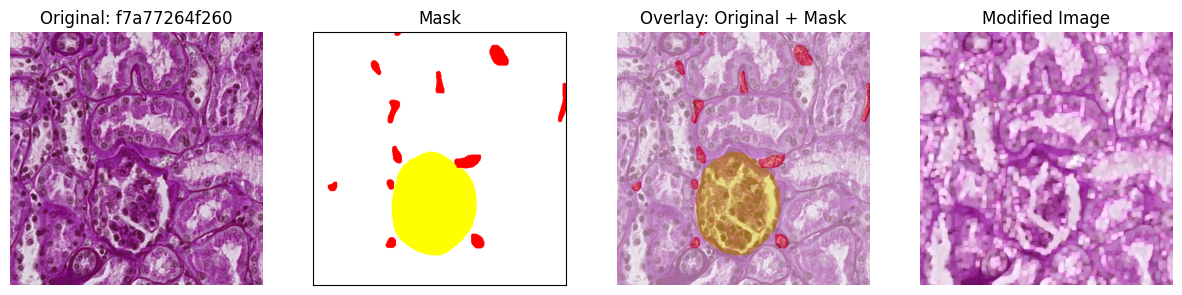

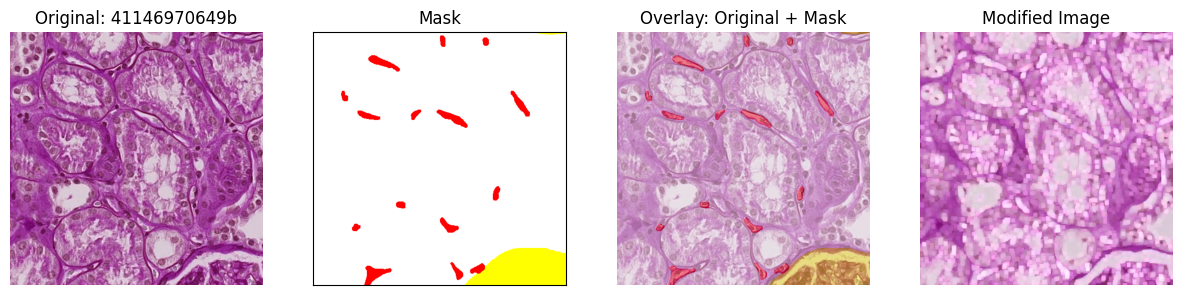

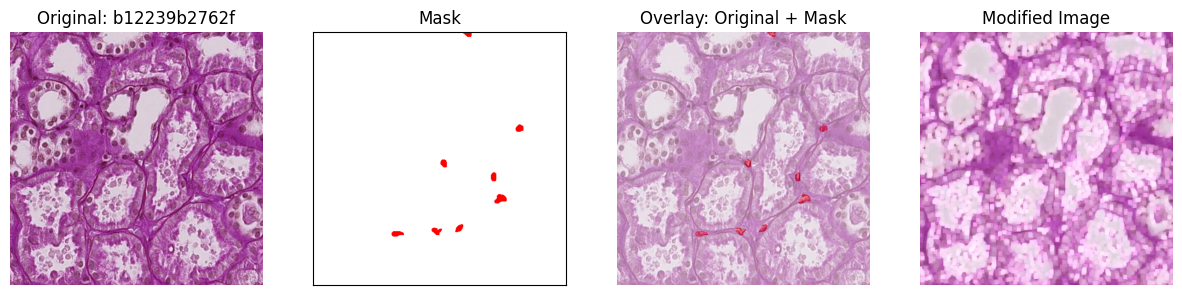

In [96]:
for _ in range(4):
  sample = images_with_masks.sample()
  image_id = sample['id'].values[0]
  image_path = sample['image_path'].values[0]
  mask_path = file_path + 'masks/' + image_id + '_mask.tif'

  display(image_id,image_path,mask_path,num)

In [109]:
!ls /gdrive/MyDrive/DATA/HuBMAP

annotation_info.csv    images		   sample_submission.csv
blue_images	       images_info.csv	   test
coco_85train_dataset   masks		   test2
coco_85train_dataset2  masks_white_bkgrnd  test_list.csv
coco_85train_dataset3  norm_images	   tile_meta.csv
dilated_images	       polygons.jsonl	   train_list.csv
enhanced_images        red_images	   val_list.csv
gray_images	       Results		   wsi_meta.csv


In [108]:
#!mkdir /gdrive/MyDrive/DATA/HuBMAP/dilated_images

In [114]:
dist_image_path = '/gdrive/MyDrive/DATA/HuBMAP/dilated_images/'

In [117]:
for path in tqdm_notebook(images_with_masks['image_path'],total=len(images_with_masks)):

  image_id = path.split('/')[-1].split('.')[0]
  image = dilate(path)

  cv2.imwrite(dist_image_path + image_id + '.tif',image)


  0%|          | 0/1633 [00:00<?, ?it/s]